## Linear Programming Problems

In [ ]:
from cvxopt import matrix, solvers
c = matrix([-4.0, -5.0])
G = matrix([[2., 1., -1., 0.], [1., 2., 0., -1.]])
h = matrix([3., 3., 0., 0.])
sol = solvers.lp(c, G, h)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -8.4312e-02 -1.1190e+00  1e+00  2e-16  3e+00
 1: -8.6199e-02 -1.2895e-01  4e-02  1e-16  1e-01
 2: -1.1666e-01 -1.2587e-01  9e-03  8e-16  5e-03
 3: -1.1786e-01 -1.1808e-01  2e-04  8e-17  1e-04
 4: -1.1800e-01 -1.1800e-01  2e-06  2e-16  1e-06
 5: -1.1800e-01 -1.1800e-01  2e-08  3e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.4277e-02 -1.1189e+00  1e+00  3e-17  3e+00
 1: -8.6158e-02 -1.2883e-01  4e-02  2e-16  1e-01
 2: -1.1635e-01 -1.2554e-01  9e-03  3e-16  5e-03
 3: -1.1760e-01 -1.1783e-01  2e-04  1e-16  1e-04
 4: -1.1775e-01 -1.1776e-01  2e-06  1e-16  1e-06
 5: -1.1776e-01 -1.1776e-01  2e-08  1e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.4237e-02 -1.1188e+00  1e+00  1e-16  3e+00
 1: -8.6111e-02 -1.2868e-01  4e-02  1e-16  1e-01
 2: -1.1601e-01 -1.2516e-01  9e-03  1e-16  4e-03
 3: -1.1732e-01 -1.1756e-01  2e-04  9e-18  1e-04
 4: -1.1748e-01 -1.1748e

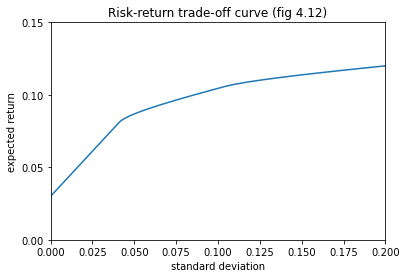

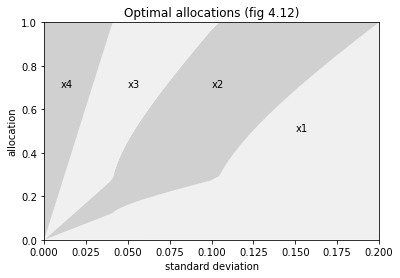

In [1]:
from math import sqrt
from cvxopt import matrix
from cvxopt.blas import dot
from cvxopt.solvers import qp
import pylab

# Problem data.
n = 4
S = matrix([[ 4e-2,  6e-3, -4e-3,    0.0 ],
            [ 6e-3,  1e-2,  0.0,     0.0 ],
            [-4e-3,  0.0,   2.5e-3,  0.0 ],
            [ 0.0,   0.0,   0.0,     0.0 ]])
pbar = matrix([.12, .10, .07, .03])
G = matrix(0.0, (n,n))
G[::n+1] = -1.0
h = matrix(0.0, (n,1))
A = matrix(1.0, (1,n))
b = matrix(1.0)

# Compute trade-off.
N = 100
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
portfolios = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]
returns = [ dot(pbar,x) for x in portfolios ]
risks = [ sqrt(dot(x, S*x)) for x in portfolios ]

# Plot trade-off curve and optimal allocations.
pylab.figure(1, facecolor='w')
pylab.plot(risks, returns)
pylab.xlabel('standard deviation')
pylab.ylabel('expected return')
pylab.axis([0, 0.2, 0, 0.15])
pylab.title('Risk-return trade-off curve (fig 4.12)')
pylab.yticks([0.00, 0.05, 0.10, 0.15])

pylab.figure(2, facecolor='w')
c1 = [ x[0] for x in portfolios ]
c2 = [ x[0] + x[1] for x in portfolios ]
c3 = [ x[0] + x[1] + x[2] for x in portfolios ]
c4 = [ x[0] + x[1] + x[2] + x[3] for x in portfolios ]
pylab.fill(risks + [.20], c1 + [0.0], '#F0F0F0')
pylab.fill(risks[-1::-1] + risks, c2[-1::-1] + c1, facecolor = '#D0D0D0')
pylab.fill(risks[-1::-1] + risks, c3[-1::-1] + c2, facecolor = '#F0F0F0')
pylab.fill(risks[-1::-1] + risks, c4[-1::-1] + c3, facecolor = '#D0D0D0')
pylab.axis([0.0, 0.2, 0.0, 1.0])
pylab.xlabel('standard deviation')
pylab.ylabel('allocation')
pylab.text(.15,.5,'x1')
pylab.text(.10,.7,'x2')
pylab.text(.05,.7,'x3')
pylab.text(.01,.7,'x4')
pylab.title('Optimal allocations (fig 4.12)')
pylab.show()